In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
# generating random data

X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# this is equation , which is used to generate the data
# y = 0.8x^2 + 0.9x + 2 

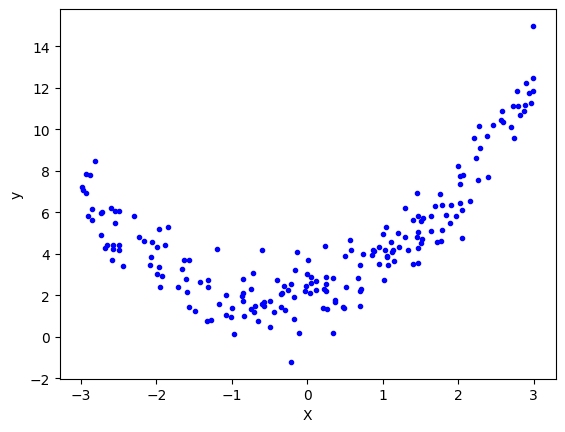

In [3]:
plt.plot(X, y, 'b. ')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [4]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [5]:
# applying linear regression
lr = LinearRegression()

In [6]:
lr.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.4036850103304689

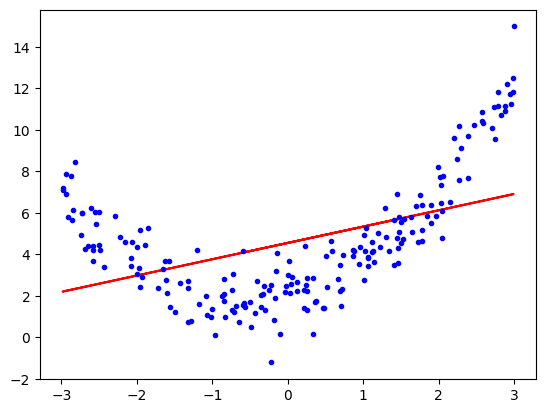

In [8]:
plt.plot(X_train, lr.predict(X_train), color='r')
plt.plot(X, y, 'b. ')

In [11]:
# applying polynomial linear regression
# degree = 2

poly = PolynomialFeatures(degree=2, include_bias=True) # it is never applied on output columns like y, and applied on both X_train and x_test

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [12]:
print(X_train[0])
print(X_train_trans[0])

[1.44931918]
[1.         1.44931918 2.10052608]


In [13]:
# include_bias parameter
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

LinearRegression()

In [15]:
y_pred = lr.predict(X_test_trans)

In [18]:
r2_score(y_test, y_pred)

0.8481109632613104

In [20]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.91151906 0.8642975 ]]
[1.96211949]


In [21]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

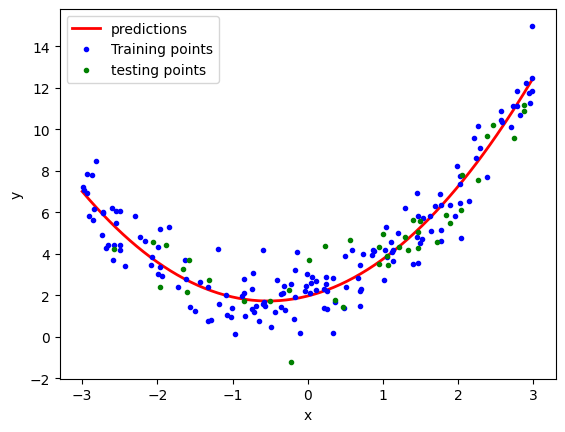

In [29]:
plt.plot(X_new, y_new, 'r-', linewidth=2, label='predictions')
plt.plot(X_train, y_train, 'b.', label='Training points')
plt.plot(X_test, y_test, 'g. ', label='testing points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [51]:
# this function will plot according to degree and show how model training line will created by model
def polynomial_regression(degree):
    X_new = np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_ploy = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()

    polynomial_regression = Pipeline([
        ('poly_features', polybig_features),
        ('std_scaler', std_scaler),
        ('lin_reg', lin_reg),
    ])

    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    
    plt.plot(X_new, y_newbig, 'r', label='Degree' + str(degree), linewidth=2)

    plt.plot(X_train, y_train, 'b. ', linewidth=3)
    plt.plot(X_test, y_test, 'g. ', linewidth=3)
    plt.legend(loc='upper left')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.axis([-3, 3, 0, 10])
    plt.show()

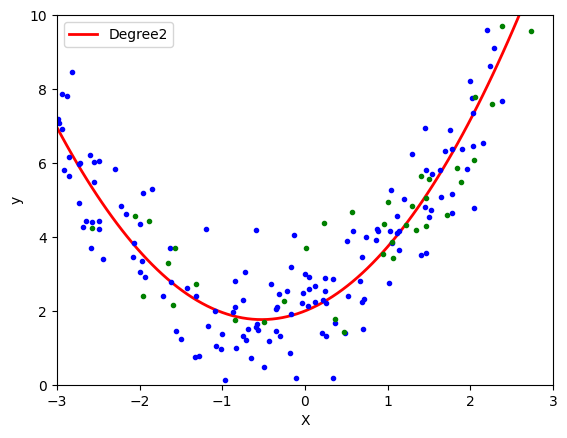

In [53]:
polynomial_regression(2)

In [59]:
print('Output: ', poly.n_output_features_)
print('Powers\n:', poly.powers_)

Output:  3
Powers
: [[0]
 [1]
 [2]]
